<a href="https://colab.research.google.com/github/nadirawijaya/KomputasiIntelegensia/blob/main/Mid_termTask_NadiraPutriWijaya2106635190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MID-TERM TASK KOMPUTASI INTELEGENSIA
##Nadira Putri Wijaya
##2106635190


# Analysis of YOLO and Transformer Integration for Behavioral Analysis

This notebook explores the technical aspects of combining YOLO (You Only Look Once) object detection with Transformer models for analyzing object behavior in video sequences.
The goal is to create a pipeline that detects objects in real-time with YOLO and then uses the bounding box coordinates over time as inputs for a Transformer model to analyze behaviors.

We will address the following key aspects:
1. **Setting Up YOLO for Object Detection**: Implementing YOLO in Google Colab to detect objects and extract bounding box coordinates for each frame.
2. **Preparing YOLO Outputs for Temporal Analysis with Transformer**: Structuring YOLO outputs to serve as time-sequenced inputs for the Transformer.
3. **Real-Time Performance Optimization**: Techniques to optimize YOLO and Transformer to maintain performance without sacrificing accuracy.
4. **Transformers for Temporal Behavior Prediction**: Using Transformer models to interpret sequences of YOLO detections and predict behaviors such as tracking or unusual activities.

Each section will provide code snippets, explanations, and insights on implementation.



## Installing Libraries
- **Torch**: Used for running YOLO and Transformer models.
- **OpenCV**: Enables video processing, such as reading and writing frames.
- **Transformers**: Provides the infrastructure to implement the Transformer model for sequence prediction.

The YOLOv5 repository includes model configurations and other dependencies that streamline the setup process.


In [4]:

# Install necessary libraries for YOLO, OpenCV, and Transformers
!pip install torch torchvision torchaudio
!pip install opencv-python-headless transformers

# Clone YOLOv5 repository and install its requirements
!git clone https://github.com/ultralytics/yolov5.git
!pip install -qr yolov5/requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:

# Import necessary libraries and load YOLOv5 model
import torch
import cv2
import numpy as np
from google.colab import drive
from google.colab import files

# Load YOLOv5 model ('yolov5s' is a lightweight, faster version)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Mount Google Drive to access video files
drive.mount('/content/drive')
video_path = '/content/drive/MyDrive/people-detection.mp4'  # Example path


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-2 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import files
uploaded = files.upload()  # Upload a video file manually if needed

# Update video_path if you upload manually
video_path = next(iter(uploaded))  # Automatically get the uploaded file path


Saving people-detection.mp4 to people-detection.mp4


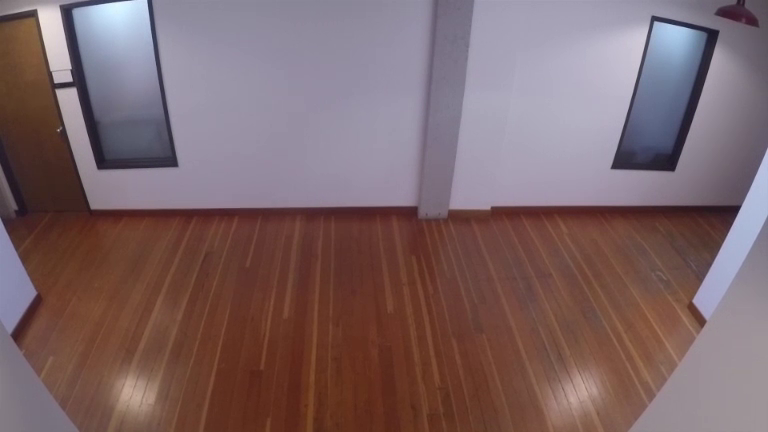

In [10]:
import cv2
from IPython.display import display, clear_output
import PIL.Image

# Load video using OpenCV
cap = cv2.VideoCapture(video_path)
output_path = '/content/drive/MyDrive/output_video.mp4'  # Save path for output
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define codec and create VideoWriter for saving output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Loop through each frame in the video
while cap.isOpened():
    ret, frame = cap.read()  # Read a frame
    if not ret:
        break

    # Perform object detection
    results = model(frame)

    # Loop over each detected object
    for detection in results.xyxy[0]:
        x1, y1, x2, y2, conf, cls = map(int, detection[:6])
        label = model.names[cls]

        # Draw bounding boxes and labels on frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Write the processed frame to output video
    out.write(frame)

    # Convert frame to RGB format for displaying in Colab
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_im = PIL.Image.fromarray(rgb_frame)

    # Display the frame in the output cell
    clear_output(wait=True)  # Clear previous output to update display
    display(pil_im)  # Show the current frame

# Release video capture and writer
cap.release()
out.release()



## Preparing YOLOv5 Output for Transformer Input
To perform behavior analysis, we need to transform YOLO's detections into a format suitable for the Transformer model. This includes:
- **Extracting and Normalizing Coordinates**: Normalize bounding box coordinates to fall between 0 and 1.
- **Structuring Data by Object ID and Frame**: For tracking, we must maintain consistency across frames, so that the same object ID is recognized over time.

### Code to Normalize and Structure Data


In [8]:

# Normalize bounding box coordinates
def normalize_coordinates(detections, frame_width, frame_height):
    normalized_detections = []
    for det in detections:
        x1, y1, x2, y2, conf, cls = det
        norm_x1, norm_y1 = x1 / frame_width, y1 / frame_height
        norm_x2, norm_y2 = x2 / frame_width, y2 / frame_height
        normalized_detections.append([norm_x1, norm_y1, norm_x2, norm_y2, conf, cls])
    return normalized_detections

# Example usage:
detections = results.xyxy[0].cpu().numpy()  # YOLO output to numpy array
frame_width, frame_height = width, height
normalized_detections = normalize_coordinates(detections, frame_width, frame_height)


In [11]:
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>